# Exercise 1.1

In [1]:
anscombe = read.csv('anscombe.csv')

In [2]:
reg1 <- lm(anscombe$y1 ~ anscombe$x1)
reg2 <- lm(anscombe$y2 ~ anscombe$x2)
reg3 <- lm(anscombe$y3 ~ anscombe$x3)
reg4 <- lm(anscombe$y4 ~ anscombe$x4)

In [3]:
summary(reg1)
# summary(reg2)
# summary(reg3)
# summary(reg4)


Call:
lm(formula = anscombe$y1 ~ anscombe$x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92127 -0.45577 -0.04136  0.70941  1.83882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0001     1.1247   2.667  0.02573 * 
anscombe$x1   0.5001     0.1179   4.241  0.00217 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6665,	Adjusted R-squared:  0.6295 
F-statistic: 17.99 on 1 and 9 DF,  p-value: 0.00217


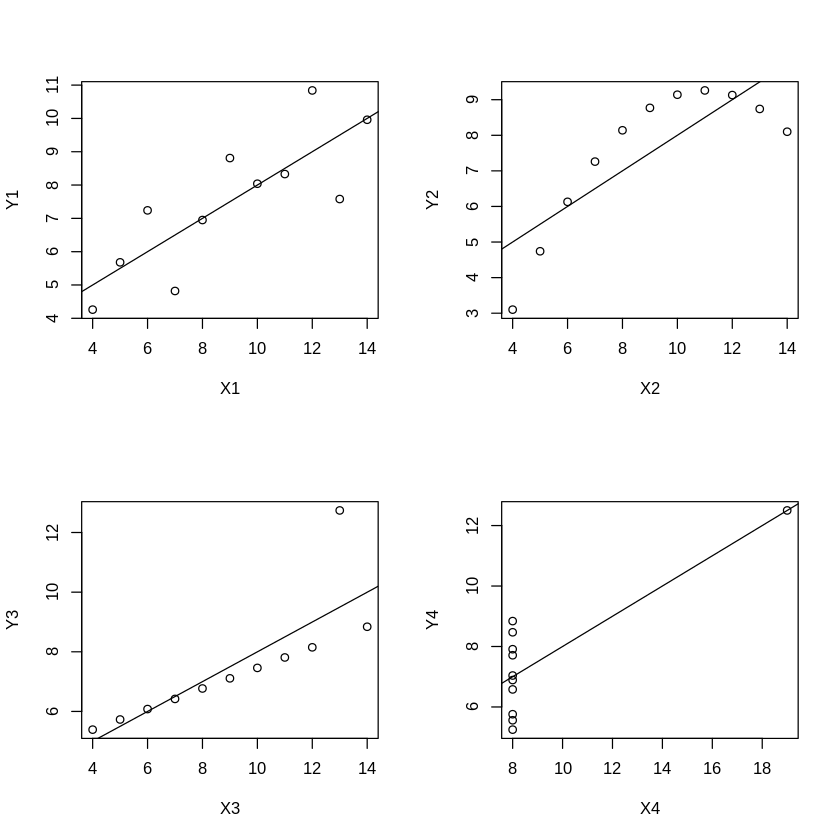

In [4]:
par(mfrow = c(2, 2))

plot(anscombe$x1, anscombe$y1, ylab = "Y1", xlab = "X1")
abline(reg1) #add the regression line

plot(anscombe$x2, anscombe$y2, ylab = "Y2", xlab = "X2")
abline(reg2) #add the regression line

plot(anscombe$x3, anscombe$y3, ylab = "Y3", xlab = "X3")
abline(reg3) #add the regression line

plot(anscombe$x4, anscombe$y4, ylab = "Y4", xlab = "X4")
abline(reg4) #add the regression line

# Exercise 1.2

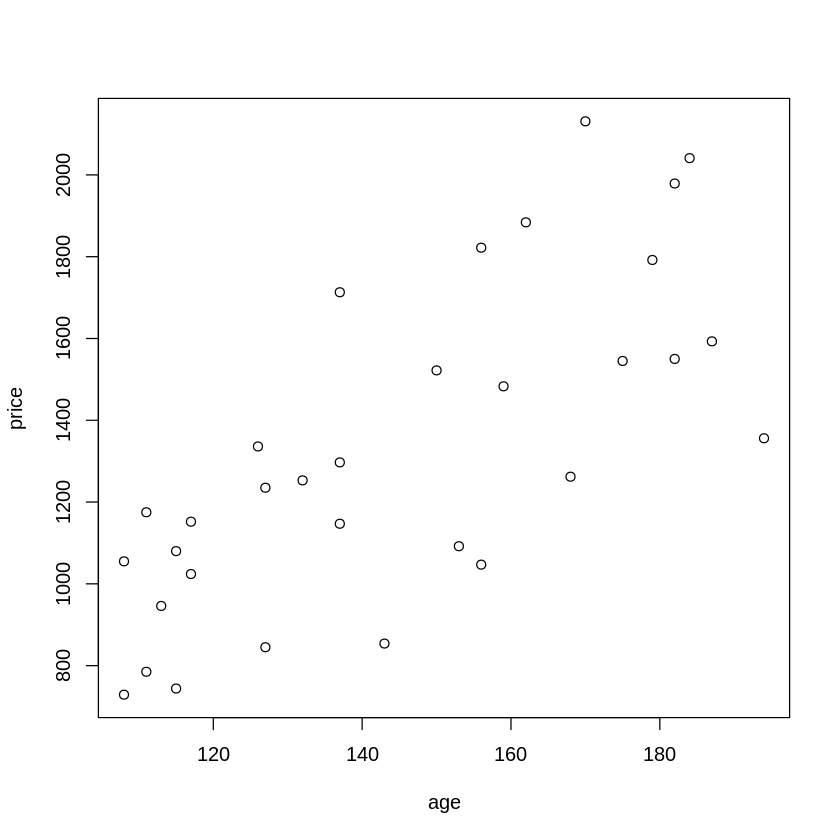

In [8]:
ant_clo <- read.table(file = "antique_clocks.dat", sep = ";",
header = T)
plot(price ~ age, data = ant_clo)

As higher the age of a clock, it looks like there is a linear dependency to the price of the clock

In [9]:
reg_clocks = lm(age ~ price, data = ant_clo)
summary(reg_clocks)


Call:
lm(formula = age ~ price, data = ant_clo)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.572 -13.466  -5.601  12.551  47.595 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 77.403660  12.016054   6.442 4.09e-07 ***
price        0.050886   0.008692   5.854 2.10e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.03 on 30 degrees of freedom
Multiple R-squared:  0.5332,	Adjusted R-squared:  0.5177 
F-statistic: 34.27 on 1 and 30 DF,  p-value: 2.096e-06


In [10]:
fit <- lm(price ~ age, data = ant_clo)
coef(fit) # exctracts estimated coefficient
summary(fit) 

(Intercept)         age 
 -191.65757    10.47909


Call:
lm(formula = price ~ age, data = ant_clo)

Residuals:
    Min      1Q  Median      3Q     Max 
-485.29 -192.66   30.75  157.21  541.21 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -191.66     263.89  -0.726    0.473    
age            10.48       1.79   5.854  2.1e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 273 on 30 degrees of freedom
Multiple R-squared:  0.5332,	Adjusted R-squared:  0.5177 
F-statistic: 34.27 on 1 and 30 DF,  p-value: 2.096e-06


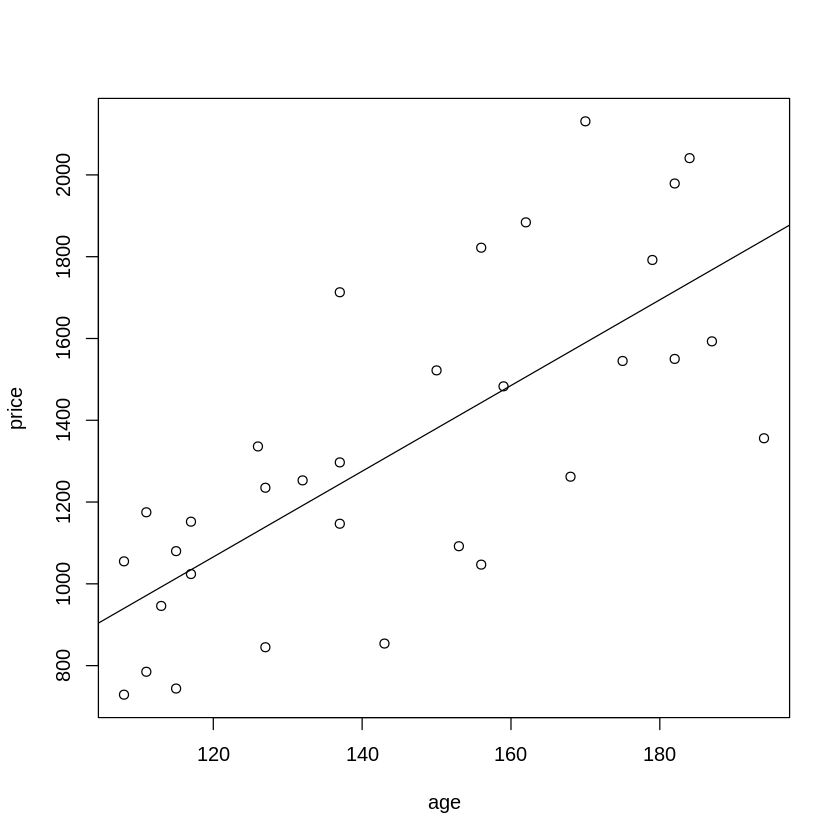

In [11]:
plot(price ~ age, data = ant_clo)
abline(fit)

# Exercise 1.3

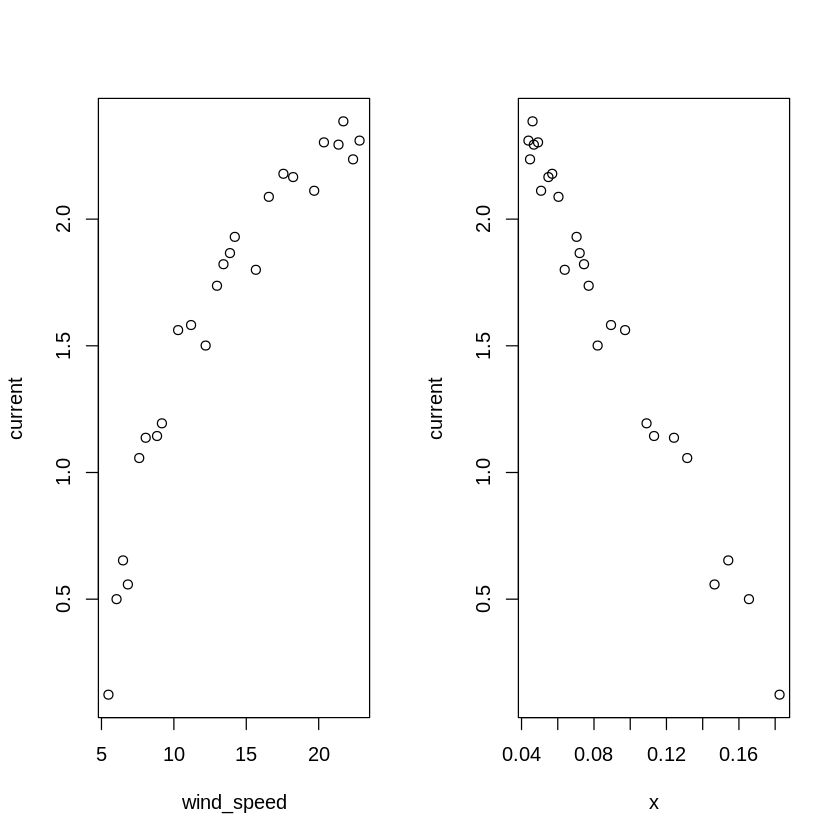

In [14]:
windmill <- read.table("windmill.dat", header = T)
windmill$x <- 1/windmill$wind_speed
par(mfrow = c(1, 2)) # two plots within one graphics
plot(current ~ wind_speed, data = windmill)
plot(current ~ x, data = windmill)

In [15]:
windmill_lm <- lm(current ~ x, data = windmill)
summary(windmill_lm)


Call:
lm(formula = current ~ x, data = windmill)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20547 -0.04940  0.01100  0.08352  0.12204 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.9789     0.0449   66.34   <2e-16 ***
x           -15.5155     0.4619  -33.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09417 on 23 degrees of freedom
Multiple R-squared:   0.98,	Adjusted R-squared:  0.9792 
F-statistic:  1128 on 1 and 23 DF,  p-value: < 2.2e-16


In [16]:
confint(windmill_lm, parm = 2, level = 0.99)

,0.5 %,99.5 %
x,-16.8121,-14.21881


In [27]:
## Explicit calculation in R:
qt(0.995, 23) ## 99.5%-quantile of t-distribution
## [1] 2.807336
# with 23 degrees of freedom
-15.5155 + c(-1, 1) * qt(0.995, 23) * 0.4619
## [1] -16.81221 -14.21879

[1] 2.807336

[1] -16.81221 -14.21879

In [33]:
plot(current ~ wind_speed, data = windmill, ylim = range(windmill$curcoef(windmill_lm)[1], 0))
## max. power production
abline(h = coef(windmill_lm)[1], col = "blue")
## expected power production:
range(windmill$x)
wm_new_2 <- data.frame(x = seq(0.043, 0.185, length = 50))
lines(1/wm_new_2$x, predict(windmill_lm, newdata = wm_new_2))
## How much wind is required in order to produce power at all
abline(v = -coef(windmill_lm)[2]/coef(windmill_lm)[1], col = 5,lty = 6)
abline(h = 0)

ERROR: Error in FUN(X[[i]], ...): attempt to apply non-function


In [30]:
wm_new <- data.frame(x = c(1, 1/10)) #
predict(windmill_lm, newdata = wm_new, interval = "confidence",level = 0.95)

,fit,lwr,upr
1,-12.536597,-13.408613,-11.664581
2,1.427314,1.386768,1.467861


In [29]:
predict(windmill_lm, newdata = wm_new, interval = "prediction",level = 0.95)

,fit,lwr,upr
1,-12.536597,-13.430108,-11.643086
2,1.427314,1.228331,1.626298


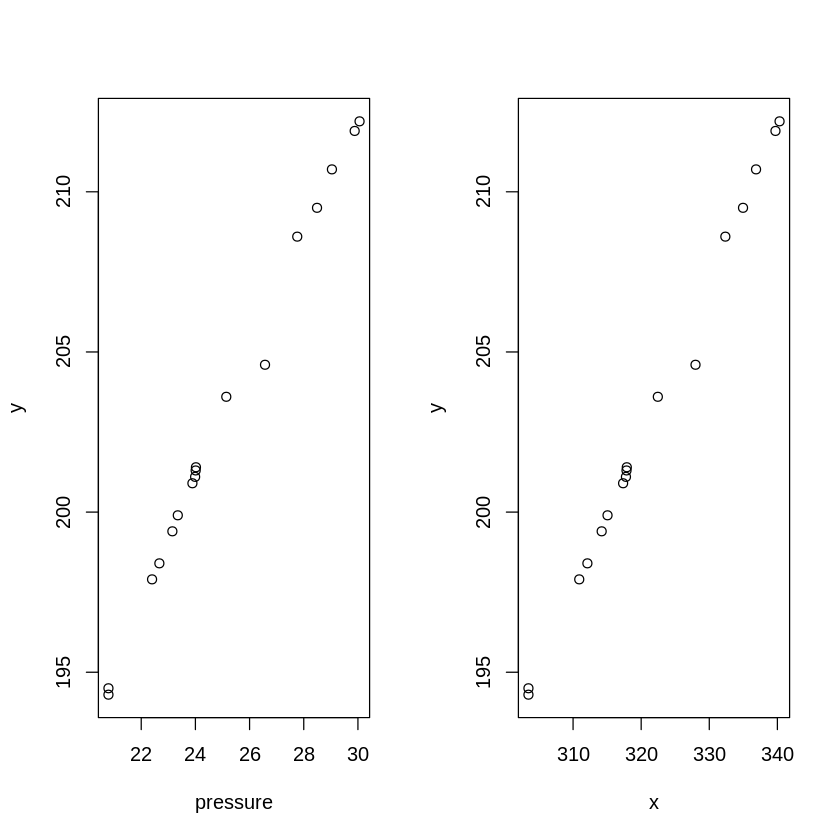

In [35]:
d_dir <- ""
Forbes <- read.table(paste(d_dir, "Forbes.dat", sep = ""),
header = T)
Forbes$x <- 100 * log(Forbes$pressure)
par(mfrow = c(1, 2))
plot(y ~ pressure, data = Forbes)
plot(y ~ x, data = Forbes)


In [36]:
Forbes_lm <- lm(y ~ x, data = Forbes)
summary(Forbes_lm)


Call:
lm(formula = y ~ x, data = Forbes)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50249 -0.04380  0.03427  0.16540  0.38366 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 47.863838   2.851689   16.78 3.93e-11 ***
x            0.482467   0.008866   54.42  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4223 on 15 degrees of freedom
Multiple R-squared:  0.995,	Adjusted R-squared:  0.9946 
F-statistic:  2962 on 1 and 15 DF,  p-value: < 2.2e-16


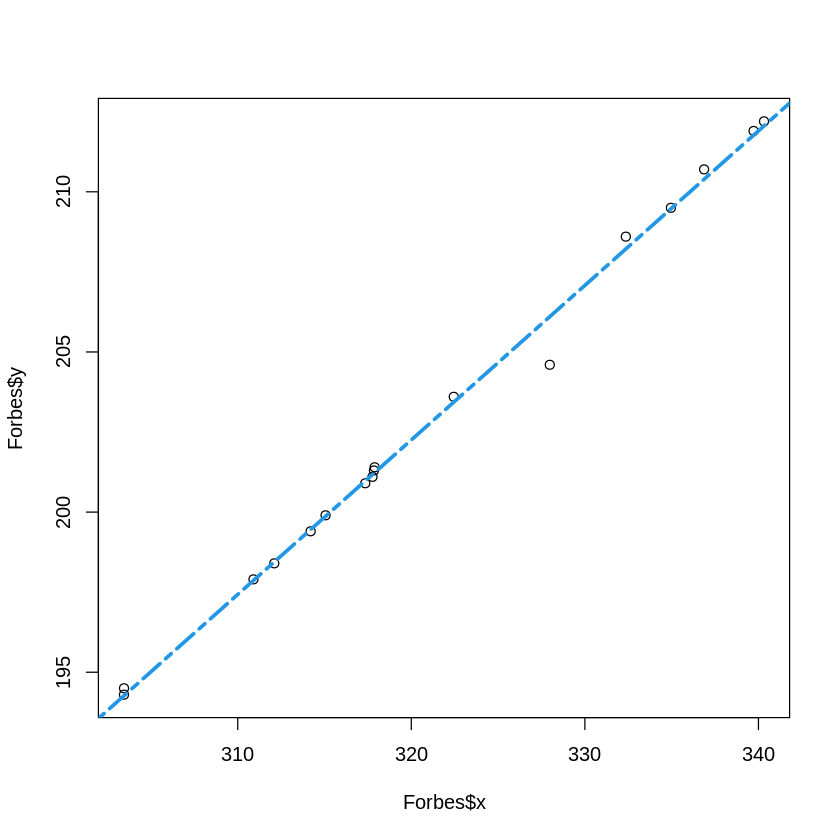

In [37]:
par(mfrow = c(1, 1))
plot(Forbes$x, Forbes$y)
abline(Forbes_lm, col = 4, lty = 6, lwd = 3)

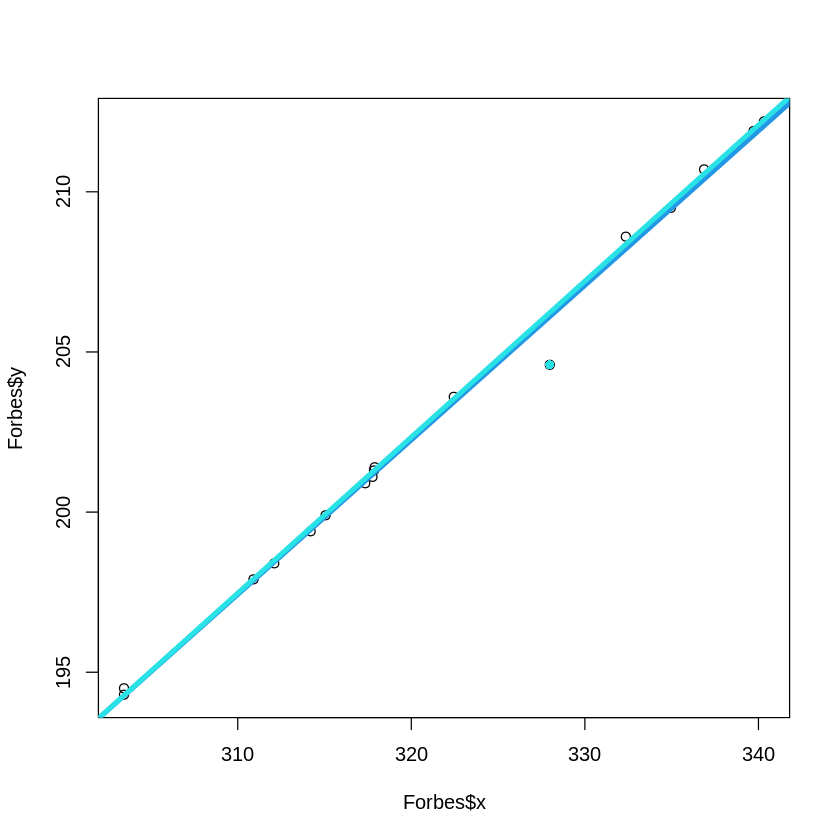

In [38]:
plot(Forbes$x, Forbes$y)
points(Forbes$x[12], Forbes$y[12], col = 5, pch = 16)
abline(Forbes_lm, col = 4, lwd = 4)
ForbesR_lm <- lm(y ~ x, data = Forbes[-12, ])
# or
ForbesR_lm <- lm(y ~ x, data = Forbes, subset = -12)
abline(ForbesR_lm, col = 5, lty = 1, lwd = 4)

In [39]:
confint(ForbesR_lm, parm = 2, level = 0.95)
## 2.5 % 97.5 %
## x 0.4813568 0.4929508

,2.5 %,97.5 %
x,0.4813568,0.4929508


In [40]:
x0 <- data.frame(x = 325.81)
predict(ForbesR_lm, newdata = x0)
## 1
## 205.1726
predict(ForbesR_lm, newdata = x0, interval = "confidence",
level = 0.95)
## fit lwr upr
## 1 205.1726 205.0989 205.2463
predict(ForbesR_lm, newdata = x0, interval = "confidence",
level = 0.99)

1 
205.1726

,fit,lwr,upr
1,205.1726,205.0989,205.2463


,fit,lwr,upr
1,205.1726,205.0703,205.2749


In [42]:
predict(ForbesR_lm, newdata = x0, interval = "prediction",level = 0.99)

,fit,lwr,upr
1,205.1726,204.7797,205.5656


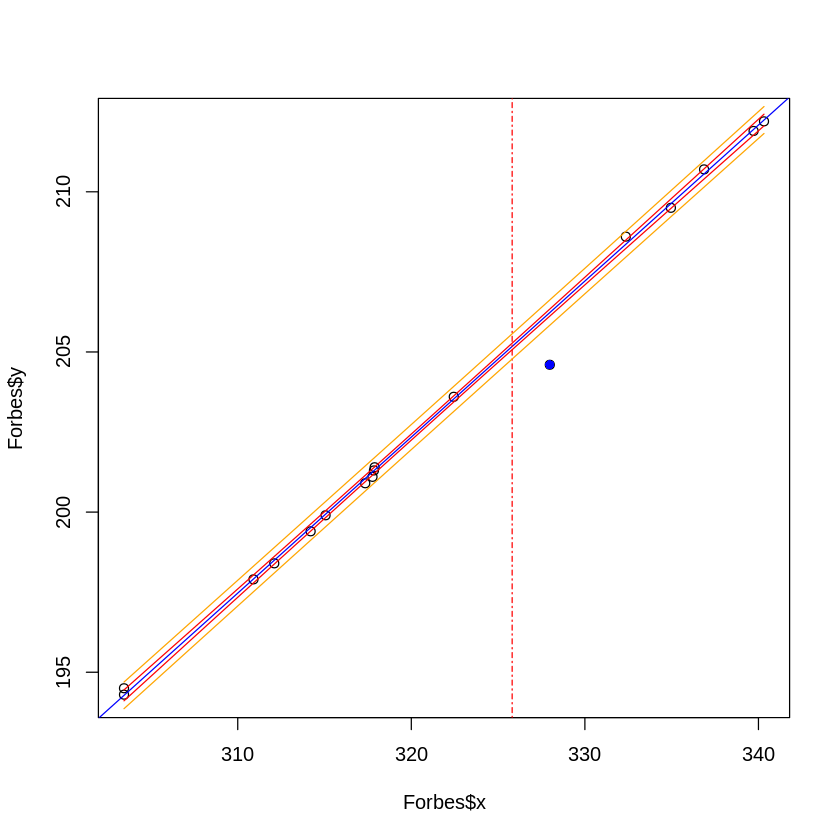

In [49]:
plot(Forbes$x, Forbes$y)
points(Forbes$x[12], Forbes$y[12], col = "blue", pch = 16)
abline(ForbesR_lm, col = "blue", lty = 1)
abline(v = 325.81, lty = 4, col = "red")
x0 <- data.frame(x = seq(min(Forbes$x), max(Forbes$x), length = 50))

ForbesR.cia <- predict(ForbesR_lm, newdata = x0, interval = "confiden", level = 0.99)
ForbesR.pia <- predict(ForbesR_lm, newdata = x0, interval = "predicti", level = 0.99)
lines(x0$x, ForbesR.cia[, "upr"], col = "red")
lines(x0$x, ForbesR.cia[, "lwr"], col = "red")
lines(x0$x, ForbesR.pia[, "upr"], col = "orange")
lines(x0$x, ForbesR.pia[, "lwr"], col = "orange")

In [51]:
x_sim <- c(0, 3, 4, 8, 10, 11, 13, 16, 17, 20)
set.seed(4711) ## always the same random numbers
error_sim <- matrix(rnorm(10 * 100, mean = 0, sd = sqrt(2)),
ncol = 100)
y_sim <- 4 + 2 * x_sim + error_sim
coef <- matrix(0, ncol = 2, nrow = 100)
for (i in 1:100) coef[i, ] <- coef(lm(y_sim[, i] ~ x_sim))
error_sim2 <- matrix(rnorm(10 * 10000, mean = 0, sd = sqrt(2)),
ncol = 10000)
y_sim2 <- 4 + 2 * x_sim + error_sim2
coef2 <- matrix(0, ncol = 2, nrow = 10000)
## Attention, this may take a while!
for (i in 1:10000) coef2[i, ] <- coef(lm(y_sim2[, i] ~ x_sim))

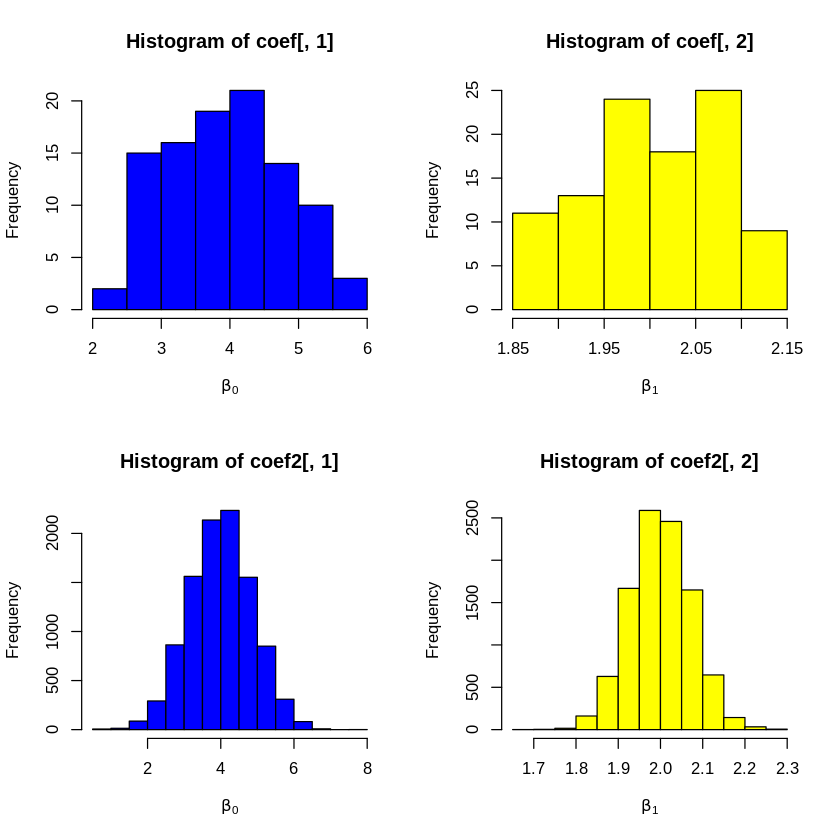

In [52]:
par(mfrow = c(2, 2))
hist(coef[, 1], xlab = expression(beta[0]), col = "blue")
hist(coef[, 2], xlab = expression(beta[1]), col = "yellow")
##
hist(coef2[, 1], xlab = expression(beta[0]), col = "blue")
hist(coef2[, 2], xlab = expression(beta[1]), col = "yellow")

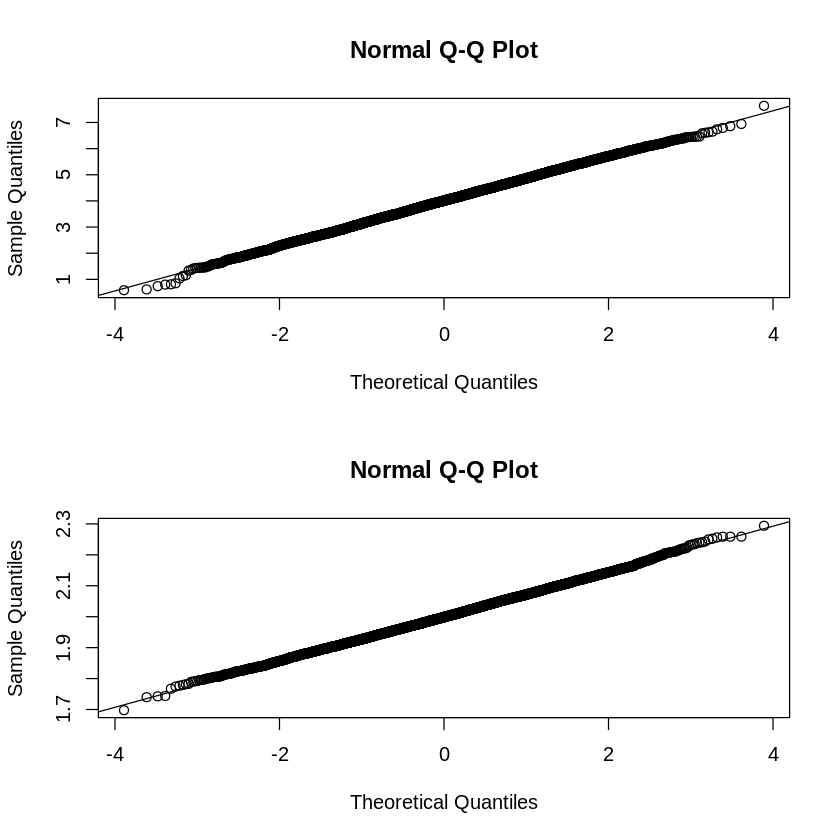

In [53]:
par(mfrow = c(2, 1))
qqnorm(coef2[, 1])
qqline(coef2[, 1])
qqnorm(coef2[, 2])
qqline(coef2[, 2])


In [55]:
par(mfrow = c(1, 2))
plot(coef[, 1], coef[, 2], xlab = expression(beta[0]), ylab = expressplot(coef2[, 1], coef2[, 2], xlab = expression(beta[0]), ylab = expression(beta[1])))

ERROR: Error in expressplot(coef2[, 1], coef2[, 2], xlab = expression(beta[0]), : could not find function "expressplot"


In [57]:
## beta_0
cat("arithmetic mean of beta_0 (100 simulations): ", mean(coef[,1]))
## arithmetic mean of beta_0 (100 simulations): 3.935716
cat("standard deviation of beta_0 (100 simulations): ",
sd(coef[, 1]))
## standard deviation of beta_0 (100 simulations): 0.8481557
cat("variation of beta_0 (100 simulations): ", var(coef[,1]))
## variation of beta_0 (100 simulations): 0.7193682
cat("arithmetic mean of beta_0 (10000 simulations): ", mean(coef2[,1]))
## arithmetic mean of beta_0 (10000 simulations): 4.001601
cat("standard deviation of beta_0 (10000 simulations): ",
sd(coef2[, 1]))
## standard deviation of beta_0 (10000 simulations): 0.8627985
cat("variation of beta_0 (10000 simulations): ", var(coef2[,1]))
## variation of beta_0 (10000 simulations): 0.7444213
## beta_1
cat("arithmetic mean of beta_1 (100 simulations): ", mean(coef[,2]))
## arithmetic mean of beta_1 (100 simulations): 2.00391
cat("standard deviation of beta_1 (100 simulations): ",
sd(coef[, 2]))
## standard deviation of beta_1 (100 simulations): 0.07282633
cat("variation of beta_1 (100 simulations): ", var(coef[,2]))
## variation of beta_1 (100 simulations): 0.005303674
cat("arithmetic mean of beta_1 (10000 simulations): ", mean(coef2[,2]))
## arithmetic mean of beta_1 (10000 simulations): 1.999616
cat("standard deviation of beta_1 (10000 simulations): ",
sd(coef2[, 2]))
## standard deviation of beta_1 (10000 simulations): 0.07211866
cat("variation of beta_1 (10000 simulations): ", var(coef2[,2]))
## variation of beta_1 (10000 simulations): 0.005201102

arithmetic mean of beta_0 (100 simulations):  3.935716standard deviation of beta_0 (100 simulations):  0.8481557variation of beta_0 (100 simulations):  0.7193682arithmetic mean of beta_0 (10000 simulations):  4.001601standard deviation of beta_0 (10000 simulations):  0.8627985variation of beta_0 (10000 simulations):  0.7444213arithmetic mean of beta_1 (100 simulations):  2.00391standard deviation of beta_1 (100 simulations):  0.07282633variation of beta_1 (100 simulations):  0.005303674arithmetic mean of beta_1 (10000 simulations):  1.999616standard deviation of beta_1 (10000 simulations):  0.07211866variation of beta_1 (10000 simulations):  0.005201102

In [58]:
## se(beta_0) :
SSx <- sum((x_sim - mean(x_sim))^2)
sqrt(2 * (1/10 + mean(x_sim)^2/SSx))
## [1] 0.8616496
## se(beta_1) :
sqrt(2/SSx)
## [1] 0.0722064


[1] 0.8616496

[1] 0.0722064